In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Lot of numerical columns have object dtype (should be floats/ints)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### 75% of customers have tenure less than 55 months

In [6]:
print(df['Churn'].value_counts())
print(100 * df['Churn'].value_counts() / len(df))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


#### The Churn to Not Chrun ratio is imbalanced (imbalanced dataset)
##### This can affect accuracy problems with prediction (can be fixed by upsampling or downsampling)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### No Missing Values!!!    ......... Yet

# Data Cleaning

In [9]:
df_copy = df.copy()

In [11]:
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors = 'coerce')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Dreaded Null Vals

In [13]:
display(df_copy.loc[df_copy['TotalCharges'].isnull() == True])
print('Percentage of null values:',  100 * df_copy['TotalCharges'].isnull().sum() / len(df_copy))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Percentage of null values: 0.15618344455487718


#### Since it is such a small percentage of null values, we will simply drop them

In [14]:
df_copy.dropna(how = 'any', inplace = True)
df_copy.loc[df_copy['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
df_copy['tenure'].max()

72

In [16]:
print('Max tenure:', df_copy['tenure'].max())
tenure_labels = ['{0} - {1}'.format(i, i + 11) for i in range(1, 72, 12)]
tenure_labels

Max tenure: 72


['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [17]:
df_copy['tenure_groups'] = pd.cut(df_copy['tenure'], range(1, 80, 12), right = False, labels = tenure_labels)
df_copy['tenure_groups'].value_counts()

tenure_groups
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

#### Splitting tenure col into groups

In [18]:
df_copy.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True)
df_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_groups'],
      dtype='object')

#### Dropping unecessary cols

# Exploratory Data Analysis

## Univariate Analysis

C:\Users\rohan.verma1\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rohan.verma1\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


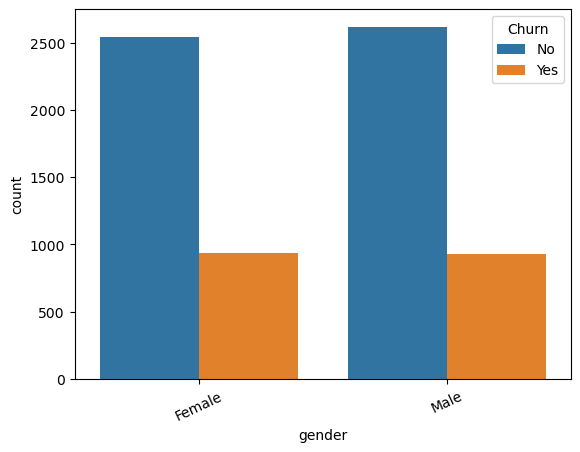

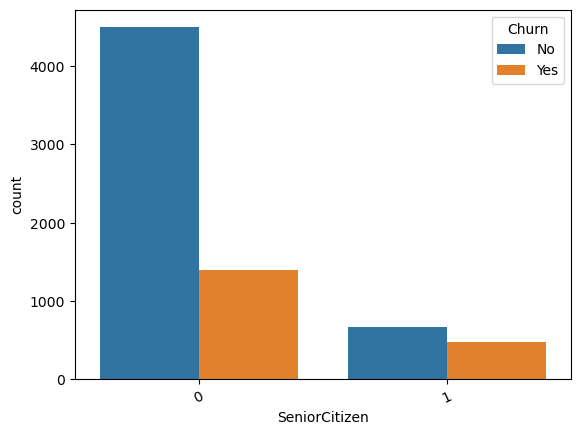

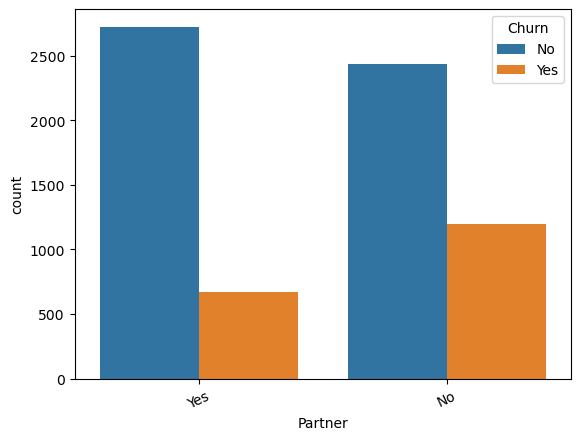

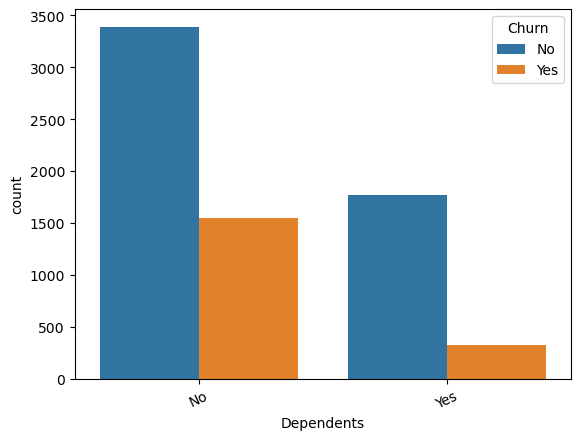

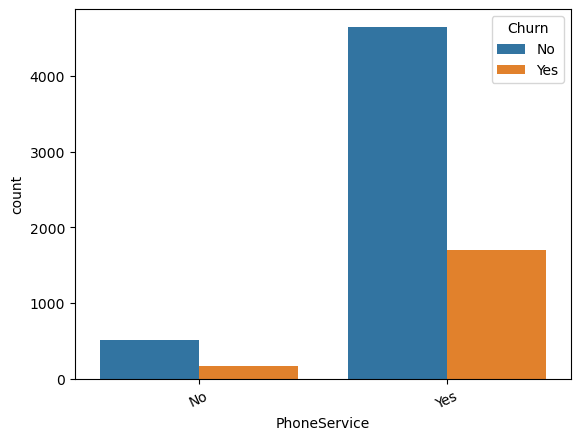

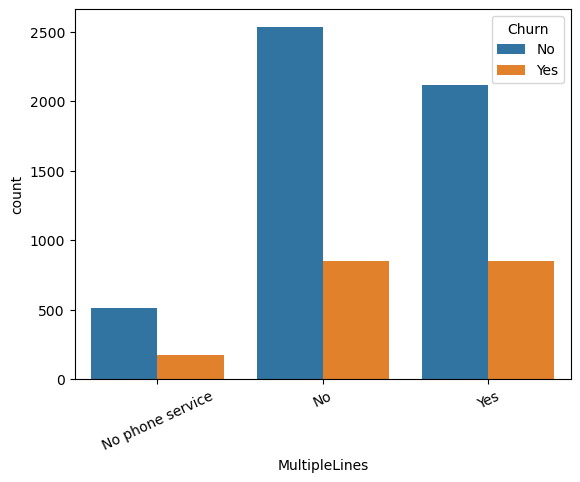

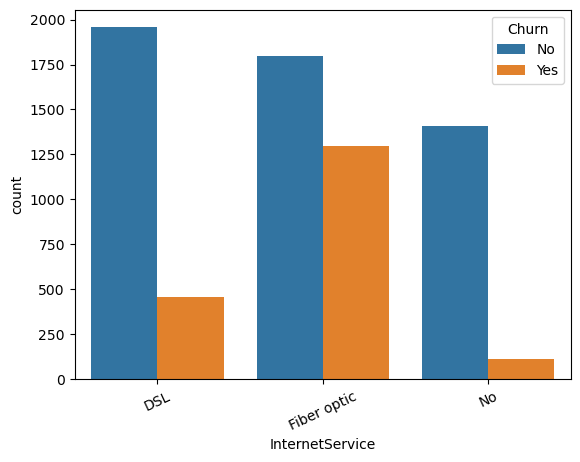

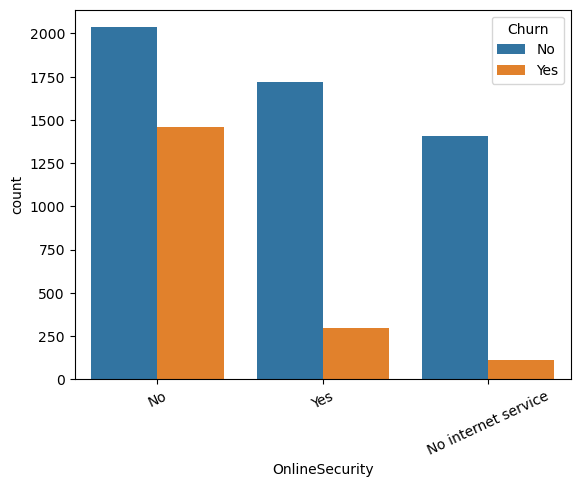

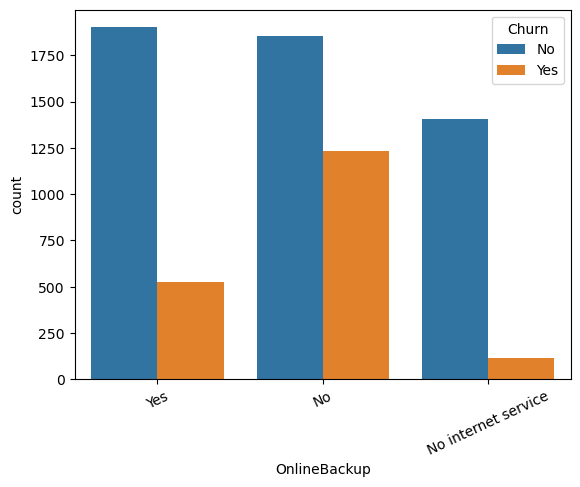

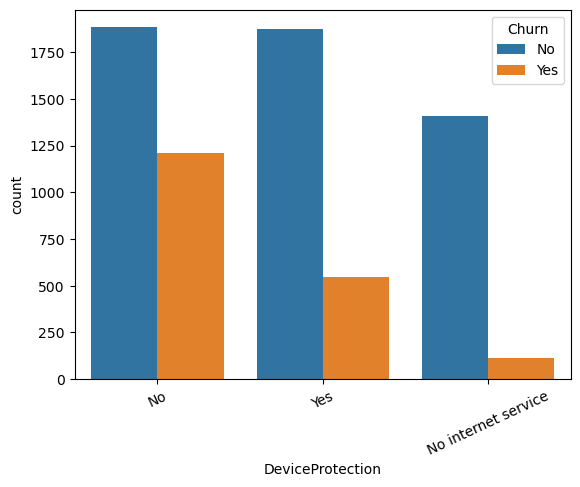

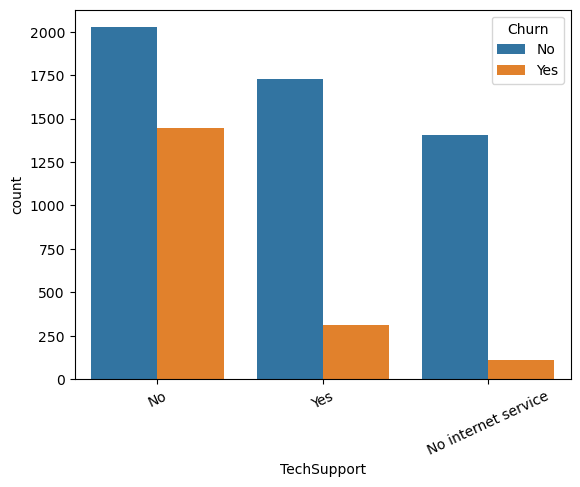

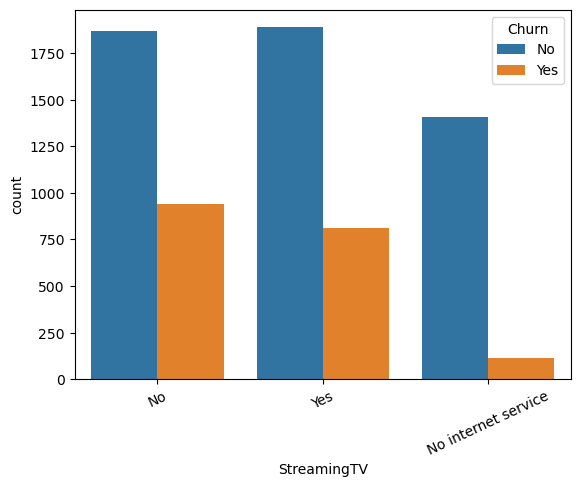

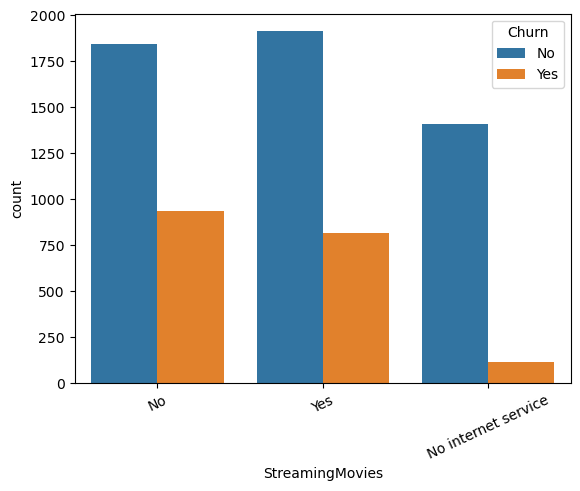

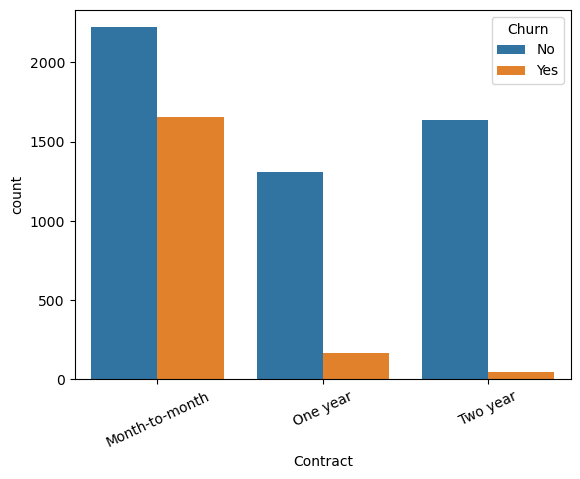

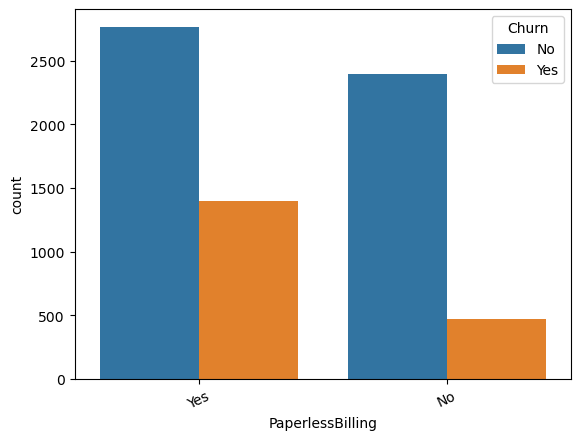

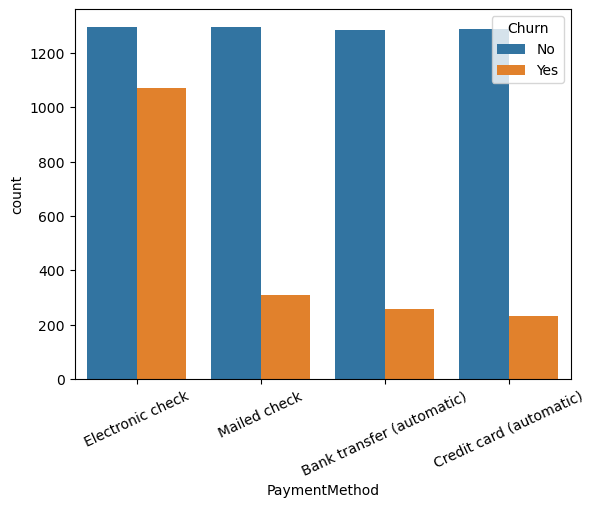

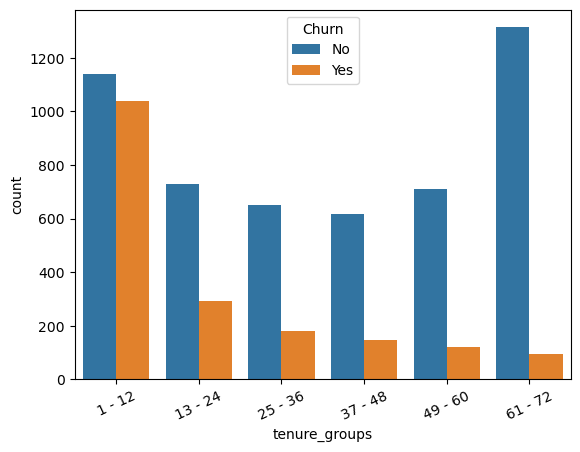

In [19]:
temp_copy = df_copy.drop(columns = ['MonthlyCharges', 'TotalCharges', 'Churn'])
for i, feature in enumerate(temp_copy):
    plt.figure(i)
    sns.countplot(data = df_copy, x = feature, hue = 'Churn')
    plt.xticks(rotation = 25)

#### Plots showing the correlation between each feature and churning

In [20]:
df_copy['Churn'] = np.where(df_copy['Churn'] == 'Yes', 1, 0)
df_copy['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

#### Converting the target (Churn) col to 1s and 0s

In [21]:
dummies_df = pd.get_dummies(df_copy)
dummies_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_groups_1 - 12,tenure_groups_13 - 24,tenure_groups_25 - 36,tenure_groups_37 - 48,tenure_groups_49 - 60,tenure_groups_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [22]:
dummies_df = dummies_df.replace({True: 1, False: 0})
dummies_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_groups_1 - 12,tenure_groups_13 - 24,tenure_groups_25 - 36,tenure_groups_37 - 48,tenure_groups_49 - 60,tenure_groups_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### One hot encoding the categorical variables

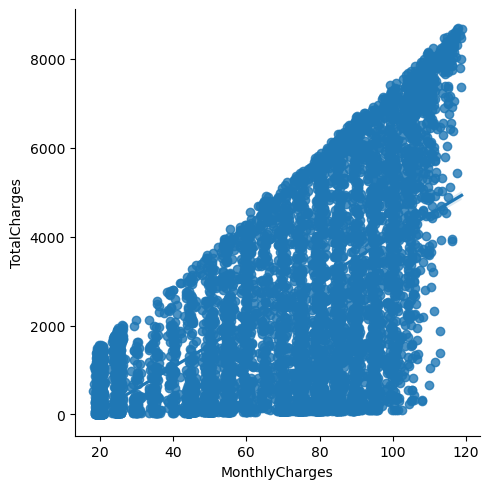

In [23]:
sns.lmplot(data = dummies_df, x = 'MonthlyCharges', y = 'TotalCharges')

#### Relationship between MonthlyCharges and TotalCharges

C:\Users\rohan.verma1\AppData\Local\Temp\ipykernel_24716\1110764022.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly_charges_plt = sns.kdeplot(dummies_df['MonthlyCharges'][(dummies_df['Churn'] == 0)], color = 'Red', shade = True)
C:\Users\rohan.verma1\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan.verma1\AppData\Local\Temp\ipykernel_24716\1110764022.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly_charges_plt = sns.kdeplot(dummies_df['MonthlyCharges'][(dummies_df['Churn'] == 1)], color = 'Blue', shade = True)
C:\Use

Text(0.5, 1.0, 'Monthly Charges by Churn')

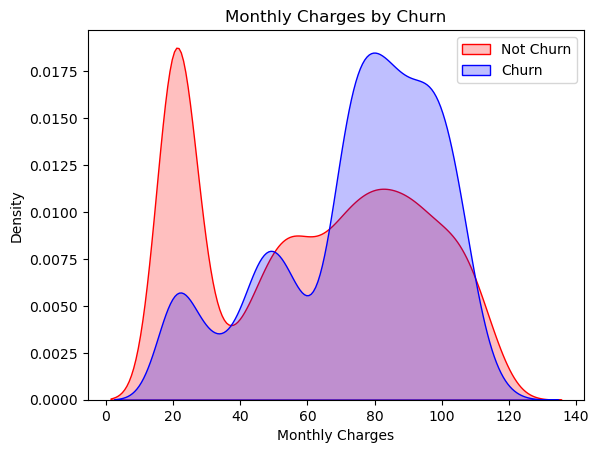

In [25]:
monthly_charges_plt = sns.kdeplot(dummies_df['MonthlyCharges'][(dummies_df['Churn'] == 0)], color = 'Red', shade = True)
monthly_charges_plt = sns.kdeplot(dummies_df['MonthlyCharges'][(dummies_df['Churn'] == 1)], color = 'Blue', shade = True)
monthly_charges_plt.legend(['Not Churn', 'Churn'])
monthly_charges_plt.set_xlabel('Monthly Charges')
monthly_charges_plt.set_ylabel('Density')
monthly_charges_plt.set_title('Monthly Charges by Churn')

#### High Monthly Charges = High Churn 

C:\Users\rohan.verma1\AppData\Local\Temp\ipykernel_24716\4119517495.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  total_charges_plt = sns.kdeplot(dummies_df['TotalCharges'][(dummies_df['Churn'] == 0)], color = 'Red', shade = True)
C:\Users\rohan.verma1\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan.verma1\AppData\Local\Temp\ipykernel_24716\4119517495.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  total_charges_plt = sns.kdeplot(dummies_df['TotalCharges'][(dummies_df['Churn'] == 1)], color = 'Blue', shade = True)
C:\Users\rohan

Text(0.5, 1.0, 'Total Charges by Churn')

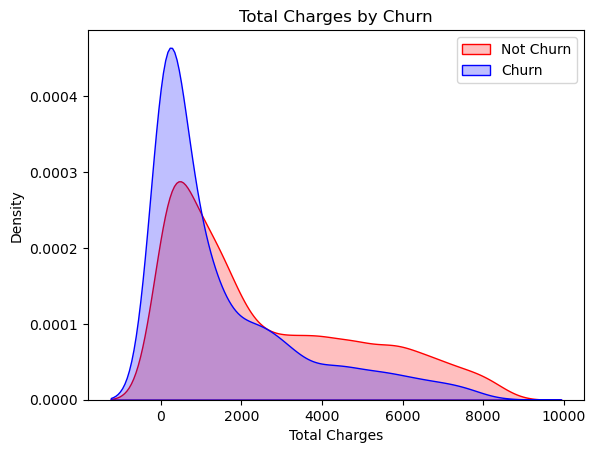

In [26]:
total_charges_plt = sns.kdeplot(dummies_df['TotalCharges'][(dummies_df['Churn'] == 0)], color = 'Red', shade = True)
total_charges_plt = sns.kdeplot(dummies_df['TotalCharges'][(dummies_df['Churn'] == 1)], color = 'Blue', shade = True)
total_charges_plt.legend(['Not Churn', 'Churn'])
total_charges_plt.set_xlabel('Total Charges')
total_charges_plt.set_ylabel('Density')
total_charges_plt.set_title('Total Charges by Churn')

#### Surprisingly Higher Churn at Lower Total Charges

<Axes: >

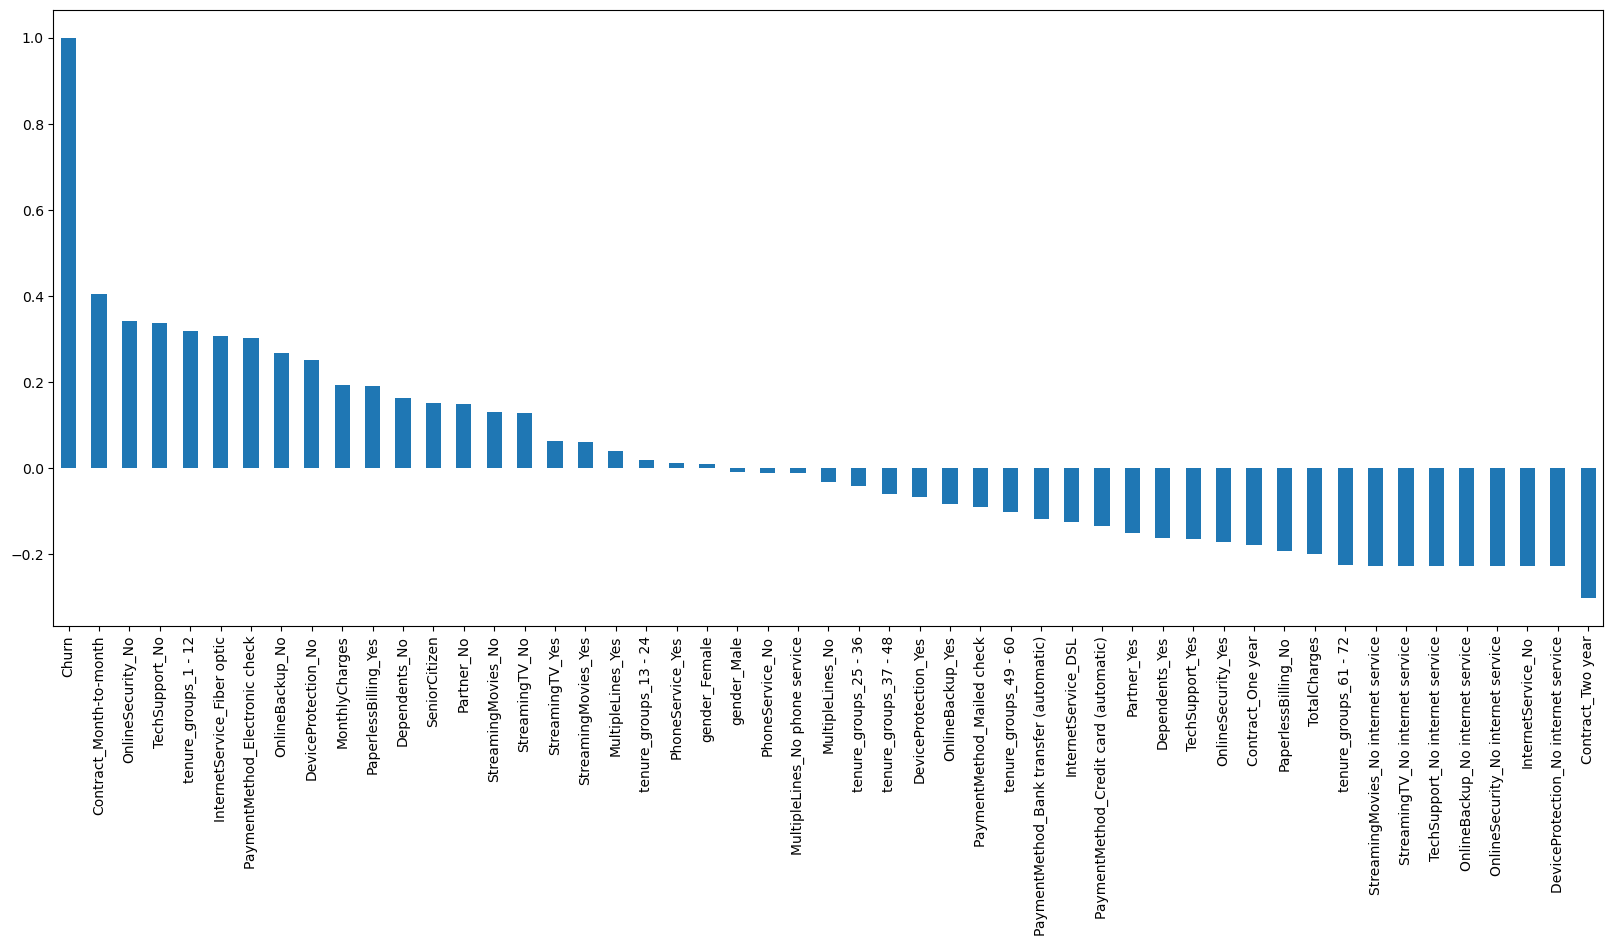

In [39]:
plt.figure(figsize = (20,8))
dummies_df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

#### High Churn in Month to Month Contracts, No Online Security, No Tech Support, 1 - 12 Month Tenure etc.

In [40]:
churned_df = df_copy.loc[df_copy['Churn'] == 1] 
not_churned_df = df_copy.loc[df_copy['Churn'] == 0] 

# Saving the cleaned data for Churn Prediction

In [49]:
dummies_df.to_csv('cleaned_data.csv')